# Group 7 Group Project
 
## Predictive Analysis: Prediction & Matching of Refugee Influx to Job Demands with the Purpose of Providing Settlement and Employment.  

# 1. CRISP-DM - Business Understanding.

## 1.1 Problem Statement:

Refugees are in need of acceptance into asylum countries to which refugees could settle down, and employment opportunity.

There are multiple countries that provide asylum. If all refugees focus on going to one country, they will quickly exhaust the resources available from that country that was allocated for the refugees.

What we want to do to solve this problem is predict how many refugees will flow into a country and job demand in those countries. Then matching the number of refugees with job demand. If there is a gap, then providing guidance for increasing intake and job opportunities in those countries.

## 1.2 Objective: 
The research aims to provide 

1. a prediction on refugee influx each year​
2. a prediction of demand for employment the asylum countries to which refugees can fulfill

The above predictions aims to match and provide data-driven insights to assist in improving lives of refugees.

*Note: The datasets to be searched for,
1. Historical Refugee Numbers & Relevant Parameters (ie. Economic, Social & Legal) 
2. Historical Asylum Countries' Refugee Intake Numbers 
3. Asylum Countries Labour Market Data. 

# 2. CRISP-DM - Data Understanding

## 2.1 Datasets: 

### Initial collected datasets

1. https://www.unhcr.org/refugee-statistics/
2. https://www.kaggle.com/datasets/unitednations/refugee-data
3. https://www.unhcr.org/data.html
4. https://www.unhcr.org/refugee-statistics/methodology/
5. https://reporting.unhcr.org/#_ga=2.15208630.1238382503.1667656093-1972231935.1667656093
6. https://rs.io/100-interesting-data-sets-for-statistics/
7. https://www.reddit.com/r/datasets/
8. https://data.europa.eu/en
9. https://data.gov.au/search?q=unemployement
10. https://data.gov.sg/
11. https://www.unhcr.org/5273a9e89.pdf 

### Shortlisted datasets

1. https://microdata.unhcr.org/index.php/catalog/681/study-description#metadata-data_collection (Refugee information in the US)
2. https://www.bls.gov/charts/job-openings-and-labor-turnover/opening-hire-seps-level.htm (Job Openings in the US)

Additional statistics collected after analysing original dataset
2. https://www.macrotrends.net/countries/DEU/germany/refugee-statistics

3. https://www.macrotrends.net/countries/USA/united-states/refugee-statistics

4. https://www.macrotrends.net/countries/FRA/france/refugee-statistics

5. https://www.macrotrends.net/countries/CAN/canada/refugee-statistics

6. https://data.bls.gov/PDQWeb/ln (LabourForceParticipationRate Dataset)




## 2.2 Data Understanding: Exploratory Data Analysis

How many datapoints.

Main features/labels.

Average values (mean, range etc.)

Initial gap finding. How many refugees versus how many intake currently.

Any missing data or inconsistency.

### 2.2.1 ASR dataset 
### In this dataset we hope we can explore whether these refugees need work. 

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime
import re
import os

In [ ]:
df_raw = pd.read_csv('ASR.csv')
print(df_raw.shape)
df_raw

(4905, 265)


,Variable,hhid,personid,respondent,cohort,qn1a,numppl,qn1b,qn1c,qn1d,...,qn34b_05,ui_qn8a_annual,ui_qn10a_annual,ui_cashassist,ui_lfp,ui_emprate,ui_medicaidrma,ui_lpr,ui_school,ui_work
0,NaN,2,22,0,3,2,5,11,NaN,998.0,...,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,2,23,0,3,3,5,11,NaN,998.0,...,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,2,25,0,3,5,5,11,NaN,7.0,...,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,2,24,0,3,4,5,11,NaN,8.0,...,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,2,21,1,3,1,5,1,4.0,30.0,...,NaN,NaN,NaN,2,1.0,1.0,1.0,2.0,7.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4900,NaN,9327,93272,0,1,2,4,2,1.0,998.0,...,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN
4901,NaN,9332,93322,0,1,2,4,2,1.0,27.0,...,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN
4902,NaN,9332,93321,1,1,1,4,1,1.0,28.0,...,NaN,NaN,NaN,2,2.0,3.0,2.0,1.0,0.0,2.0
4903,NaN,9332,93323,0,1,3,4,4,NaN,3.0,...,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Count the number of missing values in each column
df_raw.isnull().sum()

Variable          4905
hhid                 0
personid             0
respondent           0
cohort               0
                  ... 
ui_emprate        1876
ui_medicaidrma    1876
ui_lpr            1877
ui_school         2036
ui_work           1880
Length: 265, dtype: int64

In [ ]:
df_raw.describe()

,Variable,hhid,personid,respondent,cohort,qn1a,numppl,qn1b,qn1c,qn1d,...,qn34b_05,ui_qn8a_annual,ui_qn10a_annual,ui_cashassist,ui_lfp,ui_emprate,ui_medicaidrma,ui_lpr,ui_school,ui_work
count,0.0,4905.000000,4905.000000,4905.000000,4905.000000,4905.000000,4905.000000,4905.000000,3548.000000,4905.000000,...,87.000000,310.000000,4.000000,4905.000000,3029.000000,3029.000000,3029.000000,3028.000000,2869.000000,3025.000000
mean,NaN,4431.881753,44321.274618,0.307034,2.061366,2.457085,3.914169,3.538634,2.500846,112.844139,...,0.114943,852830.658065,20000.000000,9.701121,6.646088,7.095081,57.842192,13.358653,20.101778,5.712727
std,NaN,2628.216882,26282.184546,0.461310,0.815396,1.301055,1.223651,4.653204,1.814874,271.809867,...,0.320802,344996.814404,16227.548593,88.577389,72.328325,72.300147,230.251282,109.644367,138.149768,62.702026
min,NaN,2.000000,21.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,9500.000000,1000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,NaN,2167.000000,21672.000000,0.000000,1.000000,1.000000,3.000000,1.000000,1.000000,17.000000,...,0.000000,999998.000000,9250.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
50%,NaN,4349.000000,43493.000000,0.000000,2.000000,2.000000,4.000000,4.000000,1.000000,31.000000,...,0.000000,999998.000000,22500.000000,2.000000,1.000000,1.000000,2.000000,1.000000,0.000000,1.000000
75%,NaN,6727.000000,67274.000000,1.000000,3.000000,3.000000,5.000000,4.000000,4.000000,47.000000,...,0.000000,999998.000000,33250.000000,2.000000,2.000000,3.000000,2.000000,1.000000,0.000000,3.000000
max,NaN,9332.000000,93324.000000,1.000000,3.000000,5.000000,5.000000,99.000000,9.000000,999.000000,...,1.000000,999999.000000,34000.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000


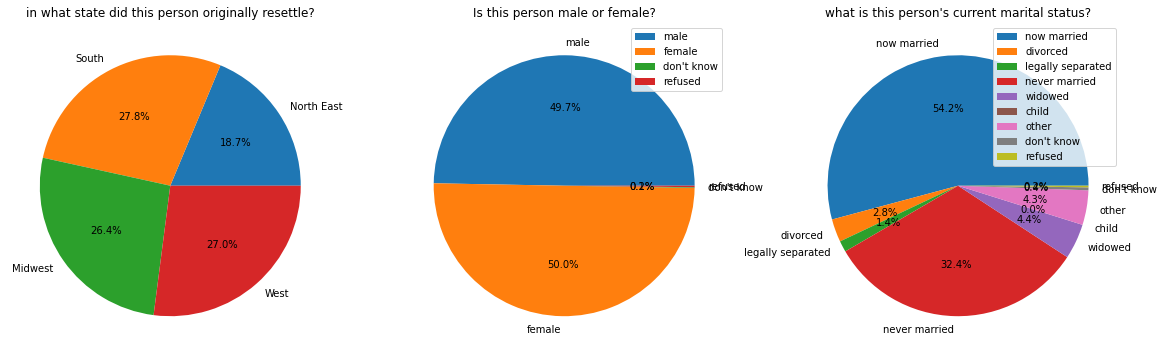

In [ ]:
import pylab as pl
#in what state did this person originally resettle?

fig, axs = plt.subplots(1, 3, figsize=(20, 6))

piedata={"North East":0,"South":0,"Midwest":0,"West":0}
for i in df_raw['qn1k']:
    if i==1: piedata["North East"]+=1
    if i==2 : piedata["South"]+=1
    if i==3 : piedata["Midwest"]+=1
    if i==4 : piedata["West"]+=1

axs[0].pie(piedata.values(),labels=piedata.keys(),autopct='%3.1f%%')


axs[0].set_title('in what state did this person originally resettle?')
 

piedata={"male":0,"female":0,"don't know":0,"refused":0}
for i in df_raw['qn1f']:
    if i==1: piedata["male"]+=1
    if i==2: piedata["female"]+=1
    if i==8: piedata["don't know"]+=1
    if i==9: piedata["refused"]+=1

axs[1].pie(piedata.values(),labels=piedata.keys(),autopct='%3.1f%%')
axs[1].set_title('Is this person male or female?')
axs[1].legend()

piedata={"now married":0,"divorced":0,"legally separated":0,"never married":0,
         "widowed":0,"child":0,"other":0,"don't know":0,"refused":0}

for i in df_raw['qn1c']:
    if i==1: piedata["now married"]+=1
    if i==2: piedata["divorced"]+=1
    if i==3: piedata["legally separated"]+=1
    if i==4: piedata["never married"]+=1
    if i==5: piedata["widowed"]+=1
    if i==6: piedata["child"]+=1
    if i==7: piedata["other"]+=1
    if i==8: piedata["don't know"]+=1
    if i==9: piedata["refused"]+=1

axs[2].pie(piedata.values(),labels=piedata.keys(),autopct='%3.1f%%')
axs[2].set_title("what is this person's current marital status?")
axs[2].legend()

plt.show()

We can observe some basic information of the refugees

Text(0.5, 1.0, 'Is this person currently enrolled in an english language training program?')

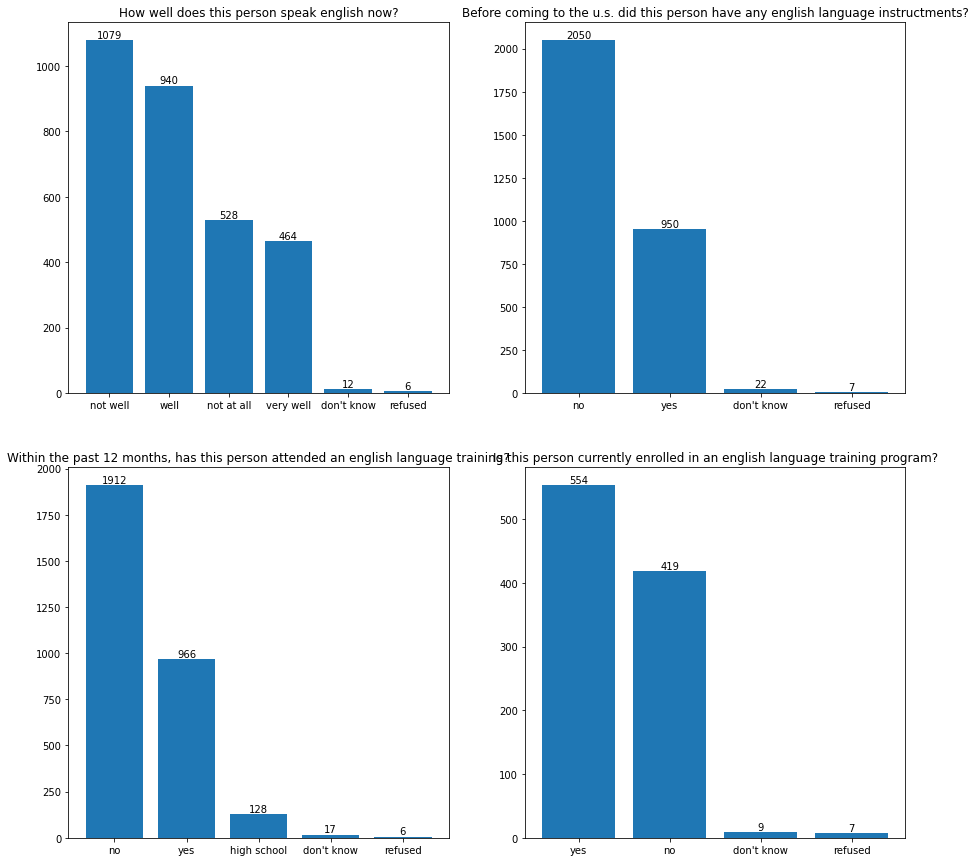

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(15,15))

result = df_raw['qn4b'].value_counts()

x=result.index.astype(int)
x = x.map({1: "very well", 2: "well", 3: "not well", 4: "not at all", 8: "don't know", 9: "refused"})

y=result
for a,b in zip(x, y):
     axs[0,0].text(a, b, b, ha='center', va='bottom')
axs[0,0].bar(x, y)
axs[0,0].set_title('How well does this person speak english now?')


result = df_raw['qn4c'].value_counts()
x=result.index.astype(int)
x = x.map({1: "no", 2: "yes",8: "don't know", 9: "refused"})
y=result
for a,b in zip(x, y):
     axs[0,1].text(a, b, b, ha='center', va='bottom')
axs[0,1].bar(x, y)
axs[0,1].set_title('Before coming to the u.s. did this person have any english language instructments?')



result = df_raw['qn4e'].value_counts()
x=result.index.astype(int)
x = x.map({1: "no", 2: "yes",6:"high school",8:"don't know", 9: "refused"})
y=result
for a,b in zip(x, y):
     axs[1,0].text(a, b, b, ha='center', va='bottom')
axs[1,0].bar(x, y)
axs[1,0].set_title('Within the past 12 months, has this person attended an english language training?')



result = df_raw['qn4j'].value_counts()
x=result.index.astype(int)
x = x.map({1: "no", 2: "yes",8: "don't know", 9: "refused"})
y=result
for a,b in zip(x, y):
     axs[1,1].text(a, b, b, ha='center', va='bottom')
axs[1,1].bar(x, y)
axs[1,1].set_title('Is this person currently enrolled in an english language training program?')



This is information about refugee learning situations.

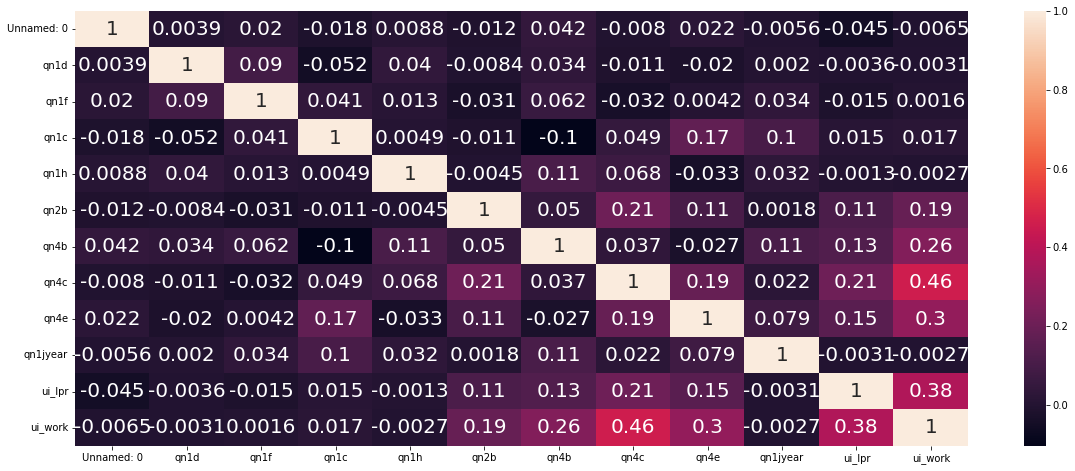

In [ ]:
##This is information about refugee learning situations.
import seaborn as sns

data=pd.read_csv('clean_Data_11.csv')

%matplotlib inline
plt.figure(figsize=(20,8))
sns.heatmap(data.corr(), annot=True, annot_kws={"fontsize":20})
plt.show()

We can see that there is no obvious relationship between the refugees' learning situation, basic data and other information.

### 2.2.2 Multi-country dataset

### In this datase we hope to make predictions about the future number of open asylums in the US

In [ ]:
df_mul = pd.read_csv('mul_country.csv')
print(df_mul.shape)
df_mul.describe()

(62, 9)


,us_Refugees_Granted_Asylum,us_AnnualChange,Ge_Asylum,Ge_AnnualChange,France_Refugees,Fr_AnnualChange,Canada_Refugees,Canada_AnnualChange
count,62.000000,61.000000,6.200000e+01,61.000000,62.000000,61.000000,62.000000,61.000000
mean,472171.370968,1.382951,5.445676e+05,7.639180,187780.354839,1.648689,98859.193548,4.441967
std,135204.167877,20.920986,4.218515e+05,41.137472,80706.213650,9.394454,58751.952488,23.861587
min,262006.000000,-66.670000,8.350000e+04,-68.200000,98900.000000,-32.990000,9980.000000,-72.400000
25%,368736.750000,-2.610000,1.250000e+05,-2.630000,137950.000000,-1.020000,29976.500000,-6.600000
50%,500000.000000,0.000000,5.752690e+05,0.080000,172631.500000,2.960000,113533.500000,2.430000
75%,530000.000000,3.750000,9.052500e+05,8.050000,196095.000000,6.710000,145723.500000,7.850000
max,843434.000000,122.350000,1.418000e+06,275.200000,499914.000000,21.200000,186555.000000,85.060000


In [ ]:
plt.rcParams['axes.unicode_minus'] = False
df_mul.plot(x='date',y=['us_Refugees_Granted_Asylum','Ge_Asylum','France_Refugees','Canada_Refugees'],figsize=(12,6),title='Refugees Granted Asylum of each coutry')

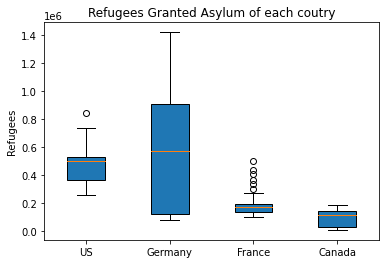

In [ ]:
data = [df_mul['us_Refugees_Granted_Asylum'],df_mul['Ge_Asylum'],df_mul['France_Refugees'],df_mul['Canada_Refugees']]

plt.boxplot(data, labels=['US', 'Germany', 'France', 'Canada'],patch_artist=True)
plt.title("Refugees Granted Asylum of each coutry")
plt.ylabel("Refugees")
plt.show()

We get the number of asylum openings each year in four countries.In the boxplot, we can see some outliers.


# 3. Data Preparation

Select data - We will choose some parameters of refugee info. We will also take the country asylum numbers and jobs numbers (time series)

Clean data - find null or N/A and do imputation or deletion






## 3.1 Data Selection

In [ ]:
# We select the correct dataset fore the cleaning
df = pd.read_csv("Original_dataset_WQD7003.csv")

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,2

In [ ]:
# We try to see the data
df

,Variable,hhid,personid,respondent,cohort,qn1a,numppl,qn1b,qn1c,qn1d,...,qn34b_05,ui_qn8a_annual,ui_qn10a_annual,ui_cashassist,ui_lfp,ui_emprate,ui_medicaidrma,ui_lpr,ui_school,ui_work
0,Label,unique household id,unique person id,binary indicator: survey respondent or househo...,cohort of arrival in us,"1a. let's start with you. not counting you, te...",number of people in household (up to 5),1b. what is this person's relationship to the ...,1c. what is this person's current marital status?,1d. what was this person's age at last birthday?,...,34b. which household members received such ass...,ui: qn8a responses converted to annual earnings,ui: qn10a responses converted to annual earnings,ui: household receipt of cash assistance,ui: labor force participation,ui: employment rate,ui: receipt of rma/medicaid,ui: legal permanent residency status,ui: adults' education pursuit in the u.s.,ui: work status
1,NaN,2,22,0,3,2,5,11,NaN,998.00,...,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,2,23,0,3,3,5,11,NaN,998.00,...,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,2,25,0,3,5,5,11,NaN,7.00,...,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,2,24,0,3,4,5,11,NaN,8.00,...,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4901,NaN,9327,93272,0,1,2,4,2,1.0,998.0,...,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN
4902,NaN,9332,93322,0,1,2,4,2,1.0,27.0,...,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN
4903,NaN,9332,93321,1,1,1,4,1,1.0,28.0,...,NaN,NaN,NaN,2,2.0,3.0,2.0,1.0,0.0,2.0
4904,NaN,9332,93323,0,1,3,4,4,NaN,3.0,...,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# After some analysis we have selected 12 column names as only these are related to our study
df_related = df[['qn1d','qn1f','qn1c','qn1h','qn2b','qn3b','qn4b','qn4c','qn4e','qn1jyear','ui_lpr','ui_work']]

In [ ]:
# we try to see the new dataset created
df_related

,qn1d,qn1f,qn1c,qn1h,qn2b,qn3b,qn4b,qn4c,qn4e,qn1jyear,ui_lpr,ui_work
0,1d. what was this person's age at last birthday?,1f. is this person male or female?,1c. what is this person's current marital status?,1h. what is this person's country of citizenship?,2b. what was the highest degree or certificate...,3b. what kind of work (activities) did this pe...,4b. how well does this person speak english now?,4c. before coming to the u.s. did this person ...,"4e. within the past 12 months, has this person...",1j. what month and year did this person enter ...,ui: legal permanent residency status,ui: work status
1,998.00,2,NaN,98,NaN,NaN,NaN,NaN,NaN,2014,NaN,NaN
2,998.00,1,NaN,98,NaN,NaN,NaN,NaN,NaN,2014,NaN,NaN
3,7.00,2,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8.00,1,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
4901,998.0,2,1.0,97,NaN,NaN,NaN,NaN,NaN,2015.0,NaN,NaN
4902,27.0,1,1.0,24,NaN,NaN,NaN,NaN,NaN,2014.0,NaN,NaN
4903,28.0,2,1.0,3,6.0,97.0,2.0,2.0,2.0,2015.0,1.0,2.0
4904,3.0,1,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 3.2 Data Cleaning

In [ ]:
# Display the number of null values in the dataset
total_null_values = df_related.isnull().sum()
total_null_values

qn1d           0
qn1f           0
qn1c        1357
qn1h           0
qn2b        1876
qn3b        2826
qn4b        1876
qn4c        1876
qn4e        1876
qn1jyear     645
ui_lpr      1877
ui_work     1880
dtype: int64

In [ ]:
# Also the percentage of the null values
tnl_percentage = 100 * df_related.isnull().sum() / len(df_related)
tnl_percentage

qn1d         0.000000
qn1f         0.000000
qn1c        27.660008
qn1h         0.000000
qn2b        38.238891
qn3b        57.602935
qn4b        38.238891
qn4c        38.238891
qn4e        38.238891
qn1jyear    13.147167
ui_lpr      38.259274
ui_work     38.320424
dtype: float64

In [ ]:
# the column which has more than 50% of data missing is omitted.
df_related.isnull().mean()
df_related.columns[df_related.isnull().mean() < 0.5]
df_sc = df_related[df_related.columns[df_related.isnull().mean() < 0.5]]
df_sc

,qn1d,qn1f,qn1c,qn1h,qn2b,qn4b,qn4c,qn4e,qn1jyear,ui_lpr,ui_work
0,1d. what was this person's age at last birthday?,1f. is this person male or female?,1c. what is this person's current marital status?,1h. what is this person's country of citizenship?,2b. what was the highest degree or certificate...,4b. how well does this person speak english now?,4c. before coming to the u.s. did this person ...,"4e. within the past 12 months, has this person...",1j. what month and year did this person enter ...,ui: legal permanent residency status,ui: work status
1,998.00,2,NaN,98,NaN,NaN,NaN,NaN,2014,NaN,NaN
2,998.00,1,NaN,98,NaN,NaN,NaN,NaN,2014,NaN,NaN
3,7.00,2,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8.00,1,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
4901,998.0,2,1.0,97,NaN,NaN,NaN,NaN,2015.0,NaN,NaN
4902,27.0,1,1.0,24,NaN,NaN,NaN,NaN,2014.0,NaN,NaN
4903,28.0,2,1.0,3,6.0,2.0,2.0,2.0,2015.0,1.0,2.0
4904,3.0,1,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Columns that has more than 20% of data missing will be filled in by the average value.
# but first we need to remove the first row as it contains text information and see data types
df_sc1 = df_sc.iloc[1:]
df_sc1

,qn1d,qn1f,qn1c,qn1h,qn2b,qn4b,qn4c,qn4e,qn1jyear,ui_lpr,ui_work
1,998.00,2,NaN,98,NaN,NaN,NaN,NaN,2014,NaN,NaN
2,998.00,1,NaN,98,NaN,NaN,NaN,NaN,2014,NaN,NaN
3,7.00,2,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8.00,1,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,30.00,2,4,3,5,2,2,2,2018,2,1
...,...,...,...,...,...,...,...,...,...,...,...
4901,998.0,2,1.0,97,NaN,NaN,NaN,NaN,2015.0,NaN,NaN
4902,27.0,1,1.0,24,NaN,NaN,NaN,NaN,2014.0,NaN,NaN
4903,28.0,2,1.0,3,6.0,2.0,2.0,2.0,2015.0,1.0,2.0
4904,3.0,1,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#convert object to numeric
# df_sc_meanFilled[['qn1c','qn2b','qn4b','qn4c','qn4e','ui_lpr','ui_work']] = df_sc_meanFilled[['qn1c','qn2b','qn4b','qn4c','qn4e','ui_lpr','ui_work']].fillna(df_sc_meanFilled[['qn1c','qn2b','qn4b','qn4c','qn4e','ui_lpr','ui_work']].mean)
dfv2 = df_sc1.apply(pd.to_numeric, errors='coerce')
dfv2.dtypes

qn1d        float64
qn1f          int64
qn1c        float64
qn1h          int64
qn2b        float64
qn4b        float64
qn4c        float64
qn4e        float64
qn1jyear    float64
ui_lpr      float64
ui_work     float64
dtype: object

In [ ]:
# Now we fill the values with mean
dfv2[['qn1c','qn2b','qn4b','qn4c','qn4e','ui_lpr','ui_work']] = dfv2[['qn1c','qn2b','qn4b','qn4c','qn4e','ui_lpr','ui_work']].fillna(value = dfv2[['qn1c','qn2b','qn4b','qn4c','qn4e','ui_lpr','ui_work']].mean())
dfv2

,qn1d,qn1f,qn1c,qn1h,qn2b,qn4b,qn4c,qn4e,qn1jyear,ui_lpr,ui_work
1,998.0,2,2.500846,98,8.889072,2.589303,1.382965,1.585342,2014.0,13.358653,5.712727
2,998.0,1,2.500846,98,8.889072,2.589303,1.382965,1.585342,2014.0,13.358653,5.712727
3,7.0,2,2.500846,24,8.889072,2.589303,1.382965,1.585342,NaN,13.358653,5.712727
4,8.0,1,2.500846,24,8.889072,2.589303,1.382965,1.585342,NaN,13.358653,5.712727
5,30.0,2,4.000000,3,5.000000,2.000000,2.000000,2.000000,2018.0,2.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...
4901,998.0,2,1.000000,97,8.889072,2.589303,1.382965,1.585342,2015.0,13.358653,5.712727
4902,27.0,1,1.000000,24,8.889072,2.589303,1.382965,1.585342,2014.0,13.358653,5.712727
4903,28.0,2,1.000000,3,6.000000,2.000000,2.000000,2.000000,2015.0,1.000000,2.000000
4904,3.0,1,2.500846,24,8.889072,2.589303,1.382965,1.585342,NaN,13.358653,5.712727


In [ ]:
# Now as qn1jyear has less than 20% of data missing and the data will be more correct if it is filled by the median of the column
dfv2['qn1jyear'] = dfv2['qn1jyear'].fillna(value = dfv2['qn1jyear'].median())
dfv2.isnull().sum()

qn1d        0
qn1f        0
qn1c        0
qn1h        0
qn2b        0
qn4b        0
qn4c        0
qn4e        0
qn1jyear    0
ui_lpr      0
ui_work     0
dtype: int64

In [ ]:
# Now the dataset is filled with appropriate data
dfv2

,qn1d,qn1f,qn1c,qn1h,qn2b,qn4b,qn4c,qn4e,qn1jyear,ui_lpr,ui_work
1,998.0,2,2.500846,98,8.889072,2.589303,1.382965,1.585342,2014.0,13.358653,5.712727
2,998.0,1,2.500846,98,8.889072,2.589303,1.382965,1.585342,2014.0,13.358653,5.712727
3,7.0,2,2.500846,24,8.889072,2.589303,1.382965,1.585342,2016.0,13.358653,5.712727
4,8.0,1,2.500846,24,8.889072,2.589303,1.382965,1.585342,2016.0,13.358653,5.712727
5,30.0,2,4.000000,3,5.000000,2.000000,2.000000,2.000000,2018.0,2.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...
4901,998.0,2,1.000000,97,8.889072,2.589303,1.382965,1.585342,2015.0,13.358653,5.712727
4902,27.0,1,1.000000,24,8.889072,2.589303,1.382965,1.585342,2014.0,13.358653,5.712727
4903,28.0,2,1.000000,3,6.000000,2.000000,2.000000,2.000000,2015.0,1.000000,2.000000
4904,3.0,1,2.500846,24,8.889072,2.589303,1.382965,1.585342,2016.0,13.358653,5.712727


In [ ]:
# Now save the data to csv file
dfv2.to_csv('clean_Data_11.csv')

# 4 Modeling & Evaluation

### Initial proposed modeling steps:
1. Regression based on time-series (main factor)
2. Variance based on refugee class (secondary factor)
3. Time-series regression of country influx of refugees (LSTM vs ARIMA [Final Decision on LSTM]) 
4. Time-series regression of gap in labour force (Linear Regression vs ARIMA vs SARIMAX [Final Decision on LinearRegression]) 
5. Fit unemployed refugees into gap in labour force 

### Note: A need for a pivot

During our mid semester proposal, we did not realize that we can't use all the data in the ASR file, to predict future unemployment. Since we hadn't learned about ML algorithms yet.

Then we found out how ML works.

The ASR dataset can only train the ML to classify/predict another person's unemployment if we can provide all the other factor data. Which we don't have for future years. So, now we have to simplify our approach and only calculate percentage unemployment from the ASR file. 

1. Time-series regression of local labour gap (Job Openings) in USA (Linear Regression vs ARIMA vs SARIMAX [Final Decision on LinearRegression])
2. Time-series regression of country influx of refugees (LSTM vs ARIMA [Final Decision on LSTM])
3. Refugee employment need estimation (simple percentage from ASR data)
4. Merging percentage of Job Openings in the US that could be fulfilled by Total Job needs by Refugees 



## 4.1 Labour Force Job Opening Prediction. 

In order to understand the gap to which refugees can fill in the labour market, a prediction of the labour market gap is conducted using the SARIMA or SARIMAX Model to take into consideration of the seasonality of the data as the labour market could be observed to be cyclical [(Crane et al, 2021)](https://www.sciencedirect.com/science/article/abs/pii/S0304407622000616). An Arima Model was also attempted but all were not good fits. 

However, upon running various Time Series Models, due to the simplicity of the data we have, the Linear Regression would be the best fitting model. 

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
#### This code is not used when compiled locally.  
##Then we upload the files 
##from google.colab import files
##uploaded = files.upload()

In [ ]:
df2 = pd.read_csv('cpsaat35.csv')

In [ ]:
#Values in Thousands
df2

,Year,January,February,March,April,May,June,July,August,September,October,November,December
0,2012,3561.0,3221.0,3582.0,3426.0,3438.0,3524.0,3356.0,3389.0,3500.0,3394.0,3513.0,3563.0
1,2013,3467.0,3584.0,3681.0,3566.0,3736.0,3749.0,3509.0,3692.0,3732.0,3827.0,3714.0,3775.0
2,2014,3738.0,3971.0,3962.0,4131.0,4307.0,4468.0,4371.0,4911.0,4446.0,4577.0,4372.0,4626.0
3,2015,4818.0,4950.0,4709.0,5077.0,5040.0,4778.0,5507.0,4973.0,5018.0,5246.0,5185.0,5304.0
4,2016,5497.0,5282.0,5633.0,5301.0,5239.0,5262.0,5375.0,5166.0,5340.0,5107.0,5394.0,5404.0
5,2017,5120.0,5418.0,5305.0,5547.0,5275.0,5731.0,5690.0,5774.0,5757.0,5855.0,5736.0,5758.0
6,2018,6007.0,5987.0,6186.0,6312.0,6387.0,6592.0,6525.0,6485.0,6722.0,6751.0,6891.0,6776.0
7,2019,6768.0,6363.0,6604.0,6508.0,6591.0,6438.0,6423.0,6406.0,6346.0,6624.0,6135.0,5992.0
8,2020,6332.0,6195.0,5218.0,4068.0,4829.0,5371.0,5786.0,5606.0,5781.0,6153.0,6120.0,6249.0
9,2021,6487.0,7129.0,7662.0,8309.0,8698.0,8958.0,9816.0,9782.0,9680.0,10158.0,9935.0,10343.0


In [ ]:
#Get average of "Jan" to "Dec" Column into a new colume into a new DF
average = df2.loc[:,'January':'December'].mean(axis=1)
average_df = pd.DataFrame(average, columns=["average"])
average_df['Year'] = df2["Year"]
average_df

,average,Year
0,3455.583333,2012
1,3669.333333,2013
2,4323.333333,2014
3,5050.416667,2015
4,5333.333333,2016
5,5580.500000,2017
6,6468.416667,2018
7,6433.166667,2019
8,5642.333333,2020
9,8913.083333,2021


In [ ]:
average_df = average_df.reindex(columns=['Year','average'])
average_df

,Year,average
0,2012,3455.583333
1,2013,3669.333333
2,2014,4323.333333
3,2015,5050.416667
4,2016,5333.333333
5,2017,5580.500000
6,2018,6468.416667
7,2019,6433.166667
8,2020,5642.333333
9,2021,8913.083333


In [ ]:
##SARIMA, SARIMAX and even ARIMA had ConvergenceWarnings: Maximum Likelihood optimization failed to converge.

# Import the LinearRegression class
from sklearn.linear_model import LinearRegression

# Column with Average LFPR to fit into Linear Regression Model
X = average_df[['Year']].astype(str)  # independent variable (Year)
y = average_df['average'] # dependent variable (average)

# Fit Linear Regression Model
model = LinearRegression()

# fit the model to the data
model.fit(X, y)

# make predictions for the next 10 years starting in 2023

start_year = 2023
end_year = start_year + 11
years = pd.DataFrame({'Year': [str(i) for i in range(start_year, end_year)]})
predictions = model.predict(years)

# create a DataFrame with the predictions and years
JOpredictions_df = pd.DataFrame({'Year': years['Year'], 'Predicted Average': predictions})

# print the DataFrame as a table
print(JOpredictions_df.to_string(index=False))


Year  Predicted Average
2023        9280.421212
2024        9843.217424
2025       10406.013636
2026       10968.809848
2027       11531.606061
2028       12094.402273
2029       12657.198485
2030       13219.994697
2031       13782.790909
2032       14345.587121
2033       14908.383333


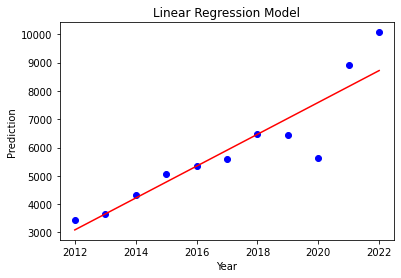

R-squared value: 0.8349643286850186


In [ ]:
import matplotlib.pyplot as plt

# Column with Average LFPR to fit into Linear Regression Model
X = average_df[['Year']]
y = average_df['average']

# Fit Linear Regression Model
model = LinearRegression()
model.fit(X, y)

# Plot the Linear Regression Model
plt.scatter(X, y, color='blue')
plt.plot(X, model.predict(X), color='red')
plt.xlabel('Year')
plt.ylabel('Prediction')
plt.title('Linear Regression Model')
plt.show()

from sklearn.metrics import r2_score
r_squared = r2_score(y, model.predict(X))
print(f'R-squared value: {r_squared}')



### 4.1.1 Labour Force Non-participation Result Interpretation:

---
* Based on the R-squared values of 0.83, it is a high fit.


* Job Openings for the next 10 years seem to be relatively stable and seem to increase as time passes. 

---

## 4.2 Prediction of total refugee numbers

In order to understand the number of refugees granted asylum, the LSTM model is used to predict the number of refugees granted asylum in the United States.
However, since the data are from 1960 to 2021 and there are many spikes during the period, our predictions are not that accurate.



In [ ]:
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_excel
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
from matplotlib import pyplot
import numpy
import tensorflow
import matplotlib.pyplot as plt

<ipython-input-36-b146fc664503>:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [ ]:
def timeseries_to_supervised(data, lag=1):
    df = DataFrame(data)
    columns = [df.shift(i) for i in range(1, lag+1)]
    columns.append(df)
    df = concat(columns, axis=1)
    df.fillna(0, inplace=True)
    return df

# Construction of differential sequences
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return Series(diff)

# Differential inverse conversion
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

# Scaling the data to a number between [-1, 1]
def scale(train, test):
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaler = scaler.fit(train)
    print(train)
    #train = train.reshape(train.shape[0], train.shape[1])
    train_scaled = scaler.transform(train)
    print(train_scaled)
    # transform test
    #test = test.reshape(test.shape[0], test.shape[1])
    test_scaled = scaler.transform(test)
    return scaler, train_scaled, test_scaled

#Data inverse scaling
def invert_scale(scaler, X, y):
    new_row = [x for x in X] + [y]
    array = numpy.array(new_row)
    print(array.shape)
    array = array.reshape(1, len(array))
    inverted = scaler.inverse_transform(array)
    return inverted[0, -1]

# Build an LSTM network model and train
def fit_lstm(train, batch_size, nb_epoch, neurons):
    X, y = train[:, 0:-1], train[:, -1]
    X = X.reshape(X.shape[0], 1, X.shape[1])
    model = Sequential()
    model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    for i in range(nb_epoch):
        model.fit(X, y, epochs=1, batch_size=batch_size, verbose=1, shuffle=False)
        model.reset_states()
    return model

# Start single-step prediction
def forecast_lstm(model, batch_size, X):
    X = X.reshape(1, 1, len(X))
    yhat = model.predict(X, batch_size=batch_size)
    return yhat[0,0]

In [ ]:
series = read_excel('united-states-refugee-statistics.xlsx', header=0, index_col=0, squeeze=True)
# Last 12 rows of data as test data
testNum = 12

In [ ]:
series

Date
1960    500000
1961    500000
1962    500000
1963    500000
1964    500000
         ...  
2017    287135
2018    313242
2019    341715
2020    340846
2021    339179
Name:  Refugees Granted Asylum, Length: 62, dtype: int64

In [ ]:
raw_values = series.values
diff_values = difference(raw_values, 1)

In [ ]:
supervised = timeseries_to_supervised(diff_values, 1)
supervised_values = supervised.values

In [ ]:
train, test = supervised_values[0:-testNum], supervised_values[-testNum:]

In [ ]:
scaler, train_scaled, test_scaled = scale(train, test)

In [ ]:
lstm_model = fit_lstm(train_scaled, 1, 2000, 4)

In [ ]:
print(train_scaled)
train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)
print(train_reshaped)
lstm_model.predict(train_reshaped, batch_size=1)

ref_predictions = list()
for i in range(len(test_scaled)):
    X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
    yhat = forecast_lstm(lstm_model, 1, X)
    print(yhat.shape)
    yhat = invert_scale(scaler, X, yhat)
    yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i)
    ref_predictions.append(yhat)
    expected = raw_values[len(train) + i + 1]
    print('Year=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))

rmse = sqrt(mean_squared_error(raw_values[-testNum:], ref_predictions))
print('Test RMSE: %.3f' % rmse)

pyplot.plot(raw_values[-testNum:], label="raw")
pyplot.plot(ref_predictions, label="prediction")
pyplot.show()

## 4.3 Refugee percentage with employment need
Based on the survey data, we calculate a percentage of refugees who need to be placed in jobs. Calculate the number of refugees who are already working now, then subtract this percentage and the remaining number is the number of refugees who need to be resettled for work.

In [ ]:
df3=pd.read_csv("clean_Data_11.csv")
df3.head()

,Unnamed: 0,qn1d,qn1f,qn1c,qn1h,qn2b,qn4b,qn4c,qn4e,qn1jyear,ui_lpr,ui_work
0,1,998.0,2,2.500846,98,8.889072,2.589303,1.382965,1.585342,2014.0,13.358653,5.712727
1,2,998.0,1,2.500846,98,8.889072,2.589303,1.382965,1.585342,2014.0,13.358653,5.712727
2,3,7.0,2,2.500846,24,8.889072,2.589303,1.382965,1.585342,2016.0,13.358653,5.712727
3,4,8.0,1,2.500846,24,8.889072,2.589303,1.382965,1.585342,2016.0,13.358653,5.712727
4,5,30.0,2,4.000000,3,5.000000,2.000000,2.000000,2.000000,2018.0,2.000000,1.000000


In [ ]:
num=df3['ui_work'].value_counts()[1]
total=len(df3)
percentage=100 - num / total * 100
print(percentage)

66.29969418960245


## 4.4 Final Prediction
### Combining the multiple predictions

We have prediction of people already searching for jobs in the USA, for 2023-2033.
We have prediction of new refugees coming to USA for 2023-2034.
We also have a percentage for refugees who need jobs, from survey data.

We combine them to find out how many jobs need to be created, or planned for, by US government to help provide refugees (and locals) with jobs.

In [ ]:
Prediction_Years=list(range(2023,2034))
Prediction_df=pd.DataFrame(Prediction_Years, columns=['Year'])

ref_predictions=[round(x) for x in ref_predictions]
Prediction_df['RefugeeTotal']=list(ref_predictions[0:11])

Prediction_df['RefugeeJobSearch']=round(Prediction_df['RefugeeTotal']*percentage/100)

Prediction_df

,Year,RefugeeTotal,RefugeeJobSearch
0,2023,340291,225612.0
1,2024,311821,206736.0
2,2025,316203,209642.0
3,2026,308501,204535.0
4,2027,312811,207393.0
5,2028,316059,209546.0
6,2029,319549,211860.0
7,2030,312764,207362.0
8,2031,327124,216882.0
9,2032,348486,231045.0


With that we merge it with the number of Job Openings in the US for each year to calculate the percentage of jobs that could be filled by refugees. 

In [ ]:
Prediction_df["Year"] = pd.to_numeric(Prediction_df["Year"])
JOpredictions_df["Year"] = pd.to_numeric(JOpredictions_df["Year"])
merged_df = pd.merge(Prediction_df, JOpredictions_df, on='Year')
merged_df["Predicted Average"] = pd.to_numeric(merged_df["Predicted Average"], errors='coerce') * 1000
merged_df['PercentageOfJobs,RefugeesCouldFill'] = (merged_df['RefugeeTotal'] / merged_df['Predicted Average']) *100
merged_df

,Year,RefugeeTotal,RefugeeJobSearch,Predicted Average,"PercentageOfJobs,RefugeesCouldFill"
0,2023,340291,225612.0,9.280421e+06,3.666762
1,2024,311821,206736.0,9.843217e+06,3.167877
2,2025,316203,209642.0,1.040601e+07,3.038656
3,2026,308501,204535.0,1.096881e+07,2.812529
4,2027,312811,207393.0,1.153161e+07,2.712640
5,2028,316059,209546.0,1.209440e+07,2.613267
6,2029,319549,211860.0,1.265720e+07,2.524642
7,2030,312764,207362.0,1.321999e+07,2.365841
8,2031,327124,216882.0,1.378279e+07,2.373424
9,2032,348486,231045.0,1.434559e+07,2.429221


## Results interpretation

We can see that throughout the years about **200k** of jobs are needed by the refugees in the US.

We can see that throughout the years about **2.4% to 3.6%%** of the available jobs (job openings) in a year could be filled be the refugees that need jobs. The calculation is by dividing Jobs Needed against Predicted Average of Job Openings to compare apple to apple

Note: Future Research: <br>
We will have to obtain more information especially when it comes to education level, skill sets, and experience to match it with the job openings to have a more accurate predictions. This prediction done is based on the assumption that Refugees are not picky, have the relevant skillset the employers are looking for, and the employers are hiring based on the skill set that matches the job. 

Research Contribution: The US Government could use these numbers as an indiciation for job allocations or refugee settlement.

# 5. Deployment

We have deployed the codes onto GitHub for the time being as there is a need to do further data collection, processing and modelling to produce a more accurate prediction of available jobs for refugees based on their education level and working experience. 


**Github Deployment**
https://github.com/JyLee98ImTrying/JobMarketDemandFulfillByRefugees 

# 6. Members Contribution 

In general, all members have been actively participating in all discussions and contributed accordingly based on their specialties.  

1. TOUHID CHOUDHURY -- 
        1. Primary Research Coordinator by Structuring, Spell- and Grammar-Checking all input in iPython Notebook by Members
        2. Proposed Research Direction and participated in discussing possible Modelling Techniques
        3. Provided direction for Data Collection
        
2. NAZMUS SAKIB
        1. Lead Coordinator for Data Collection and provided direction for Data Collection
        2. Engineer for Data Pre-processing and Cleaning
        3. Provided ideas for Research direction

3. LIU ZENING (Regina) 
        1. Lead Coordinator for EDA and provided direction for EDA
        2. Primary Engineer for EDA and Interpreted EDA findings
        3. Provided ideas and direction for Data Collection and Modelling 


4. ZHENG JIANGMENG (Jaylene)
        1. Modelling Engineer & Interpreted Results from Models and EDA
        2. Collaborated with LEE JIE YENG on the Modelling Part 
        3. Provided ideas and direction for Data Collection and Modelling 
         
5. LEE JIE YENG
        1. Assistant Research Coordinator, Modelling Engineer & Interpreted Results from Models 
        2. Collaborated with ZHENG JIANGMENG on the Modelling Part 
        3. Provided ideas and direction for Data Collection and Modelling 
